In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

In [2]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.get("https://www.starbucks.co.kr/store/store_map.do")

In [3]:
xpath_1 ='//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a'
local = driver.find_element(By.XPATH, xpath_1)
local.click()

In [4]:
xpath_2 = '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a'
seoul = driver.find_element(By.XPATH, xpath_2)
seoul.click()

In [6]:
xpath_3 = '//*[@id="mCSB_2_container"]/ul/li[1]/a'
All_tag = driver.find_element(By.XPATH, xpath_3)
All_tag.click()

In [7]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

In [8]:
req_starbucks = driver.page_source
soup_starbucks = BeautifulSoup(req_starbucks, "html.parser")

In [9]:
container = soup_starbucks.find('div', id = 'mCSB_3_container')
address = container.find_all('li')

print(address)

[<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>, <li class="quickResultLstCon" data-code="3672" data-hlytag="null" data-index="1" data-lat="37.510178" data-long="127.022223" data-name="논현역사거리" data-storecd="1434" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="논현역사거리" data-store="1434" data-yn="N">논현역사거리  </strong> <p class="result_details">서울특별시 강남구 강남대로 538 (논현동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>, <li class="quickResultLstCon" data-code="3858" data-hlytag="null" data-index="2" data-lat="37.5139309" data-long="127.0206057" data-name="신사역성일빌딩" data-storecd="1595" style="backg

In [10]:
starbucks = []

for store in address:
    store_name = store.find('strong').text
    store_address = store.find('p').text.replace('1522-3232', '')
    store_gu = store_address.split(' ')[1]
    lat = store['data-lat']
    lng = store['data-long']
    
    final = {
        '매장' : store_name,
        '매장주소' : store_address,
        '구' : store_gu,
        '브랜드' : 'STARBUCKS',
        'lat' : lat,
        'lng' : lng
    }
    
    starbucks.append(final)

starbucks

[{'매장': '역삼아레나빌딩  ',
  '매장주소': '서울특별시 강남구 언주로 425 (역삼동)',
  '구': '강남구',
  '브랜드': 'STARBUCKS',
  'lat': '37.501087',
  'lng': '127.043069'},
 {'매장': '논현역사거리  ',
  '매장주소': '서울특별시 강남구 강남대로 538 (논현동)',
  '구': '강남구',
  '브랜드': 'STARBUCKS',
  'lat': '37.510178',
  'lng': '127.022223'},
 {'매장': '신사역성일빌딩  ',
  '매장주소': '서울특별시 강남구 강남대로 584 (논현동)',
  '구': '강남구',
  '브랜드': 'STARBUCKS',
  'lat': '37.5139309',
  'lng': '127.0206057'},
 {'매장': '국기원사거리  ',
  '매장주소': '서울특별시 강남구 테헤란로 125 (역삼동)',
  '구': '강남구',
  '브랜드': 'STARBUCKS',
  'lat': '37.499517',
  'lng': '127.031495'},
 {'매장': '대치재경빌딩  ',
  '매장주소': '서울특별시 강남구 남부순환로 2947 (대치동)',
  '구': '강남구',
  '브랜드': 'STARBUCKS',
  'lat': '37.494668',
  'lng': '127.062583'},
 {'매장': '봉은사역  ',
  '매장주소': '서울특별시 강남구 봉은사로 619 (삼성동)',
  '구': '강남구',
  '브랜드': 'STARBUCKS',
  'lat': '37.515000',
  'lng': '127.063196'},
 {'매장': '압구정윤성빌딩  ',
  '매장주소': '서울특별시 강남구 논현로 834 (신사동)',
  '구': '강남구',
  '브랜드': 'STARBUCKS',
  'lat': '37.5227934',
  'lng': '127.0286009'},
 {'매장': '코엑스별마당

In [11]:
starbucks_df = pd.DataFrame(starbucks)
starbucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장      610 non-null    object
 1   매장주소    610 non-null    object
 2   구       610 non-null    object
 3   브랜드     610 non-null    object
 4   lat     610 non-null    object
 5   lng     610 non-null    object
dtypes: object(6)
memory usage: 28.7+ KB


In [12]:
starbucks_df["구"].unique(), len(starbucks_df["구"].unique())

(array(['강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구', '동작구',
        '마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구', '종로구',
        '중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구'], dtype=object),
 25)

In [13]:
starbucks_df.to_csv('./EDA_Data/starbucks_data.csv', sep = ',', encoding = 'UTF-8')

In [14]:
starbucks_df = pd.read_csv(
    "./EDA_Data/starbucks_data.csv",
    sep=',',
    encoding="UTF-8",
    index_col=0
)

In [15]:
starbucks_df.head()

,매장,매장주소,구,브랜드,lat,lng
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,STARBUCKS,37.501087,127.043069
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,STARBUCKS,37.510178,127.022223
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,STARBUCKS,37.513931,127.020606
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,STARBUCKS,37.499517,127.031495
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,STARBUCKS,37.494668,127.062583


In [16]:
starbucks_df.tail()

,매장,매장주소,구,브랜드,lat,lng
605,사가정역,서울특별시 중랑구 면목로 310,중랑구,STARBUCKS,37.579594,127.087966
606,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구,STARBUCKS,37.596890,127.086470
607,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구,STARBUCKS,37.615368,127.076633
608,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구,STARBUCKS,37.606654,127.106360
609,중화역,서울특별시 중랑구 봉화산로 35 1층,중랑구,STARBUCKS,37.601709,127.078411


In [17]:
driver.quit()

이디야

In [18]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

In [19]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.get("https://ediya.com/contents/find_store.html")

In [20]:
xpath_4 = '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a'
address_tag = driver.find_element(By.XPATH,xpath_4)
address_tag.click()

In [21]:
from tqdm import tqdm_notebook

gu_list = starbucks_df['구'].unique()

ediya = []

for gu in tqdm_notebook(gu_list):
    driver.find_element(By.XPATH,'//*[@id="keyword"]')
    
    driver.find_element(By.XPATH,'//*[@id="keyword"]').clear()
    
    driver.find_element(By.XPATH,'//*[@id="keyword"]').send_keys('서울 {}'.format(gu))

    driver.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    req_ediya = driver.page_source
    soup_ediya = BeautifulSoup(req_ediya, "html.parser")
    
    ul = soup_ediya.find('ul', id = 'placesList')
    dl = ul.find_all('dl')
    
    for i in dl:
        store_name = i.find('dt').text.strip()
        store_address = i.find('dd').text.strip()
        store_gu = store_address.split(' ')[1]
        final = {
            '매장' : store_name,
            '매장주소' : store_address,
            '구' : store_gu,
            '브랜드' : 'EDIYA'
        }
        ediya.append(final)

ediya

C:\Users\user\AppData\Local\Temp\ipykernel_24508\3467262861.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_list):


  0%|          | 0/25 [00:00<?, ?it/s]

[{'매장': '강남YMCA점', '매장주소': '서울 강남구 논현동', '구': '강남구', '브랜드': 'EDIYA'},
 {'매장': '강남구청역아이티웨딩점',
  '매장주소': '서울 강남구 학동로 338 (논현동, 강남파라곤)',
  '구': '강남구',
  '브랜드': 'EDIYA'},
 {'매장': '강남논현학동점',
  '매장주소': '서울 강남구 논현로131길 28 (논현동)',
  '구': '강남구',
  '브랜드': 'EDIYA'},
 {'매장': '강남대치점',
  '매장주소': '서울 강남구 역삼로 415 (대치동, 성진빌딩)',
  '구': '강남구',
  '브랜드': 'EDIYA'},
 {'매장': '강남도산점',
  '매장주소': '서울 강남구 도산대로37길 20 (신사동)',
  '구': '강남구',
  '브랜드': 'EDIYA'},
 {'매장': '강남세곡점',
  '매장주소': '서울 강남구 헌릉로569길 9 (세곡동, 강남지웰파인즈)',
  '구': '강남구',
  '브랜드': 'EDIYA'},
 {'매장': '강남율현점',
  '매장주소': '서울 강남구 밤고개로21길 8 (율현동, 세곡프라자)',
  '구': '강남구',
  '브랜드': 'EDIYA'},
 {'매장': '개포동역점',
  '매장주소': '서울 강남구 개포로82길 11 (개포동, 삼우빌딩)',
  '구': '강남구',
  '브랜드': 'EDIYA'},
 {'매장': '건설회관점', '매장주소': '서울 강남구 언주로 711 (논현동)', '구': '강남구', '브랜드': 'EDIYA'},
 {'매장': '대청역점',
  '매장주소': '서울 강남구 개포로109길 34 (개포동, 대청프라자)',
  '구': '강남구',
  '브랜드': 'EDIYA'},
 {'매장': '대치역점',
  '매장주소': '서울 강남구 남부순환로 2937 (대치동, 까치빌딩)',
  '구': '강남구',
  '브랜드': 'EDIYA'},
 {'매장': '도곡2동점',
  '매장주소

In [22]:
ediya_df = pd.DataFrame(ediya)
ediya_df.head()

,매장,매장주소,구,브랜드
0,강남YMCA점,서울 강남구 논현동,강남구,EDIYA
1,강남구청역아이티웨딩점,"서울 강남구 학동로 338 (논현동, 강남파라곤)",강남구,EDIYA
2,강남논현학동점,서울 강남구 논현로131길 28 (논현동),강남구,EDIYA
3,강남대치점,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",강남구,EDIYA
4,강남도산점,서울 강남구 도산대로37길 20 (신사동),강남구,EDIYA


In [23]:
driver.quit()

In [24]:
import googlemaps
import os
from dotenv import load_dotenv

In [25]:
API_KEY = os.getenv("API_KEY")

In [26]:
gmaps_key = API_KEY
gmaps = googlemaps.Client(key=API_KEY)

In [27]:
import numpy as np
ediya_df['lat'] = np.nan
ediya_df['lng'] = np.nan


In [28]:
ediya_df.head()

,매장,매장주소,구,브랜드,lat,lng
0,강남YMCA점,서울 강남구 논현동,강남구,EDIYA,NaN,NaN
1,강남구청역아이티웨딩점,"서울 강남구 학동로 338 (논현동, 강남파라곤)",강남구,EDIYA,NaN,NaN
2,강남논현학동점,서울 강남구 논현로131길 28 (논현동),강남구,EDIYA,NaN,NaN
3,강남대치점,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",강남구,EDIYA,NaN,NaN
4,강남도산점,서울 강남구 도산대로37길 20 (신사동),강남구,EDIYA,NaN,NaN


In [29]:
for idx, rows in tqdm_notebook(ediya_df.iterrows()):
    
    tmp = gmaps.geocode(rows['매장주소'])
    
    if tmp:
        lat = tmp[0].get('geometry')['location']['lat']
        lng = tmp[0].get('geometry')['location']['lng']
    
        ediya_df.loc[idx, 'lat'] = lat
        ediya_df.loc[idx, 'lng'] = lng
    else:
        print(idx, rows['매장주소'])

C:\Users\user\AppData\Local\Temp\ipykernel_24508\3251664882.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, rows in tqdm_notebook(ediya_df.iterrows()):


0it [00:00, ?it/s]

In [30]:
ediya_df.to_csv('./EDA_Data/ediya_data.csv', sep = ',', encoding = "UTF-8")
ediya_df = pd.read_csv(
                "./EDA_Data/ediya_data.csv", 
                sep=",", 
                encoding = "UTF-8",
                index_col = 0
            )

In [31]:
ediya_df.head()

,매장,매장주소,구,브랜드,lat,lng
0,강남YMCA점,서울 강남구 논현동,강남구,EDIYA,37.513679,127.031712
1,강남구청역아이티웨딩점,"서울 강남구 학동로 338 (논현동, 강남파라곤)",강남구,EDIYA,37.516551,127.040139
2,강남논현학동점,서울 강남구 논현로131길 28 (논현동),강남구,EDIYA,37.515190,127.027554
3,강남대치점,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",강남구,EDIYA,37.501434,127.052328
4,강남도산점,서울 강남구 도산대로37길 20 (신사동),강남구,EDIYA,37.522282,127.031480


In [32]:
starbucks_df['브랜드'].value_counts()

브랜드
STARBUCKS    610
Name: count, dtype: int64

In [33]:
pivot_starbucks = starbucks_df.pivot_table(index='구', values='매장', aggfunc = len)
pivot_starbucks.head()

,매장
구,
강남구,91
강동구,17
강북구,6
강서구,27
관악구,12


In [34]:
pivot_starbucks.sort_values(by = '매장', ascending = False).head(10)

,매장
구,
강남구,91
중구,52
서초구,48
영등포구,41
종로구,39
송파구,36
마포구,36
강서구,27
용산구,24


In [35]:
ediya_df['브랜드'].value_counts()

브랜드
EDIYA    695
Name: count, dtype: int64

In [36]:
pivot_ediya =  ediya_df.pivot_table(index='구', values='매장', aggfunc = len)
pivot_ediya.head()

,매장
구,
강남구,43
강동구,56
강북구,16
강서구,44
관악구,27


In [37]:
pivot_ediya.sort_values(by = '매장', ascending = False).head(10)

,매장
구,
영등포구,72
강동구,56
동작구,48
서대문구,46
강서구,44
강남구,43
성동구,42
중구,34
노원구,31


In [38]:
cafe = pd.concat([starbucks_df, ediya_df])
cafe.head()

,매장,매장주소,구,브랜드,lat,lng
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,STARBUCKS,37.501087,127.043069
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,STARBUCKS,37.510178,127.022223
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,STARBUCKS,37.513931,127.020606
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,STARBUCKS,37.499517,127.031495
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,STARBUCKS,37.494668,127.062583


In [39]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 0 to 694
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매장      1305 non-null   object 
 1   매장주소    1305 non-null   object 
 2   구       1305 non-null   object 
 3   브랜드     1305 non-null   object 
 4   lat     1305 non-null   float64
 5   lng     1305 non-null   float64
dtypes: float64(2), object(4)
memory usage: 71.4+ KB


In [40]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font",family="Malgun Gothic")
cafe_cnt = cafe.groupby(['구', '브랜드'])['매장'].count().reset_index(name = '매장개수')
cafe_cnt.head()

,구,브랜드,매장개수
0,강남구,EDIYA,43
1,강남구,STARBUCKS,91
2,강동구,EDIYA,56
3,강동구,STARBUCKS,17
4,강북구,EDIYA,16


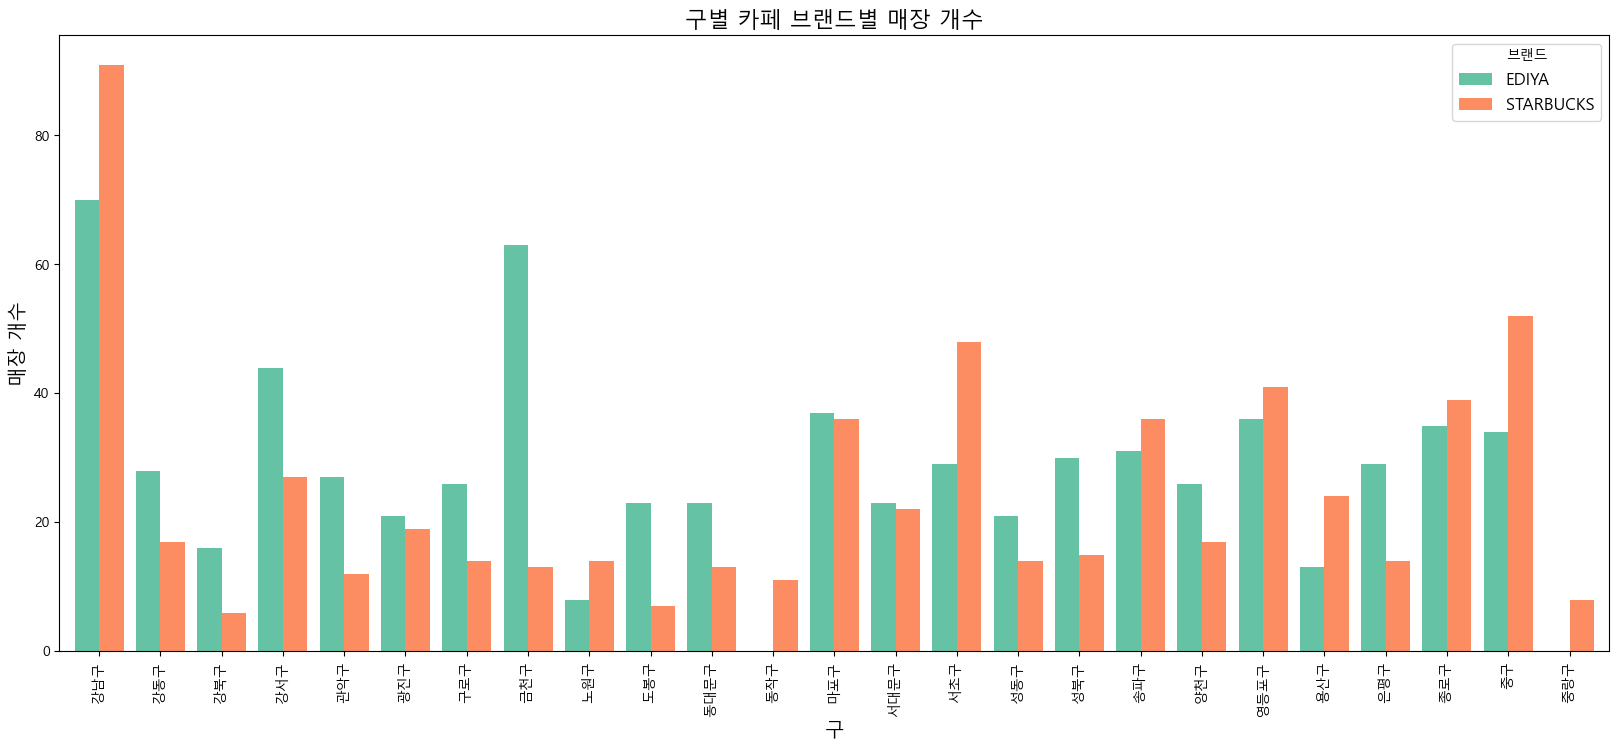

In [ ]:
cafe_cnt.pivot(index='구', columns='브랜드', values='매장개수').plot(kind='bar', figsize=(20, 8), color=['#66c2a5', '#fc8d62'], width=0.8)

plt.title('구별 카페 브랜드별 매장 개수', fontsize=16)
plt.xlabel('구', fontsize=14)
plt.ylabel('매장 개수', fontsize=14)
plt.legend(title='브랜드', fontsize=12)
plt.show()

In [41]:
import folium

my_map = folium.Map(location = [37.5147920,127.0553870], zoom_start = 11)

for idx, row in cafe.iterrows():
    
    if row['브랜드'] == 'EDIYA':
        folium.Marker(
            location = [row['lat'], row['lng']],
            tooltip = row['매장'],
            icon = folium.Icon(
                icon = 'coffee',
                color = 'darkblue',
                icon_color = 'white',
                prefix = 'fa')
        ).add_to(my_map)
        
    else:
        folium.Marker(
            location = [row['lat'], row['lng']],
            tooltip = row['매장'],
            icon = folium.Icon(
                icon = 'star',
                color = 'green',
                icon_color = 'white',
                prefix = 'fa')
        ).add_to(my_map)

my_map

In [42]:
cafe["값"]=1

cafe_cnt2 = cafe.pivot_table(index="구", columns="브랜드", values='값', aggfunc=np.sum)
cafe_cnt2.head()

브랜드,EDIYA,STARBUCKS
구,,
강남구,43.0,91.0
강동구,56.0,17.0
강북구,16.0,6.0
강서구,44.0,27.0
관악구,27.0,12.0


In [43]:
cafe_cnt2["lat"] = np.nan
cafe_cnt2["lng"] = np.nan

for idx, rows in cafe_cnt2.iterrows():
    tmp = gmaps.geocode(idx)
    if tmp:
        lat= tmp[0].get("geometry")["location"]["lat"]
        lng= tmp[0].get("geometry")["location"]["lng"]
        cafe_cnt2.loc[idx,"lat"]=lat
        cafe_cnt2.loc[idx,"lng"]=lng
        
    else:
        print(idx)

cafe_cnt2.head()

브랜드,EDIYA,STARBUCKS,lat,lng
구,,,,
강남구,43.0,91.0,37.496665,127.062980
강동구,56.0,17.0,37.550448,127.147012
강북구,16.0,6.0,37.643480,127.011184
강서구,44.0,27.0,37.561235,126.822813
관악구,27.0,12.0,37.467371,126.945336


In [ ]:
my_map1 = folium.Map(location = [37.5147920,127.0553870], zoom_start = 11)

for idx, row in cafe_cnt2.iterrows():
    
    folium.Circle(
        location = [row['lat'], row['lng']],
        radius = row['EDIYA'] * 50,
        fill = True,
        color = 'blue',
        tooltip = idx,
    ).add_to(my_map1)
        
    folium.Circle(
        location = [row['lat'], row['lng']],
        radius = row['STARBUCKS'] * 50,
        fill = True,
        color = 'red',
        tooltip = idx,
    ).add_to(my_map1)

my_map1

## 가설
- 스타벅스 매장 위치가 이디야 매장보다 전략적이다
## 결과
- 스타벅스 매장은 유동인구가 가장 많은 곳에 밀집되어 있다.
- 스타벅스는 유동인구가 적은 곳에는 적게 배치되어 있다
- 반면 이디야 매장은 유동인구랑 상관없이 골고루 배치되어 있지만 유동인구가 많은 곳은 스타벅스보다 한적히 적다
## 결론
그래서 스타벅스 매장은 이디야 매장보다 적략적인 비즈니스라고 볼 수 있다